In [35]:
import pandas as pd

df = pd.read_csv(
    "dataset.csv",
    encoding="latin-1",
    engine="python",
    on_bad_lines="skip"
)

df.head()


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [36]:
df = df[[
    "location",
    "listed_in(city)",
    "rate",
    "approx_cost(for two people)",
    "cuisines"
]]


In [37]:
df = df[df["rate"].notna()]
df = df[df["rate"] != "NEW"]
df = df[df["rate"] != "-"]

df["rate"] = df["rate"].apply(lambda x: float(str(x).split('/')[0]))


In [38]:
df["approx_cost(for two people)"] = df["approx_cost(for two people)"].str.replace(",", "")
df["approx_cost(for two people)"] = df["approx_cost(for two people)"].astype(float)


In [39]:
df.dropna(inplace=True)


In [40]:
city_counts = df["listed_in(city)"].value_counts().head(10)
city_counts


,count
listed_in(city),
BTM,2581
Jayanagar,1913
JP Nagar,1628
Koramangala 4th Block,1574
Indiranagar,1533
Church Street,1505
Brigade Road,1468
HSR,1318
Bannerghatta Road,1215


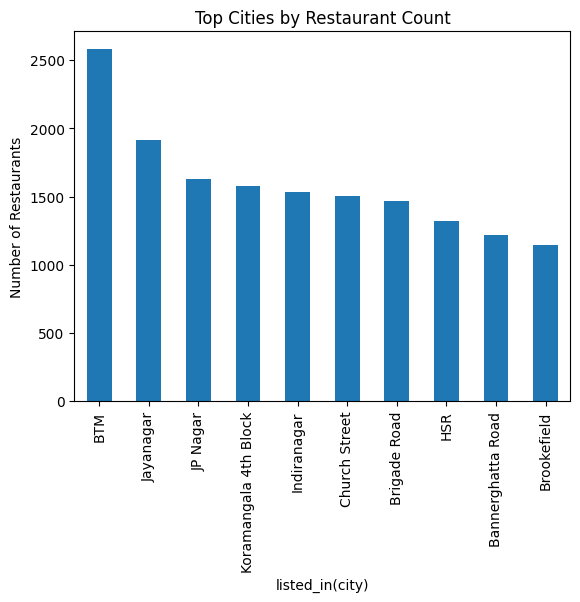

In [41]:
import matplotlib.pyplot as plt

city_counts.plot(kind="bar", title="Top Cities by Restaurant Count")
plt.ylabel("Number of Restaurants")
plt.show()


In [42]:
avg_rating_city = df.groupby("listed_in(city)")["rate"].mean().sort_values(ascending=False).head(10)
avg_rating_city


,rate
listed_in(city),
Church Street,3.801063
Brigade Road,3.796253
Koramangala 4th Block,3.764930
Indiranagar,3.741292
Frazer Town,3.717281
Basavanagudi,3.707096
BTM,3.702635
Jayanagar,3.693309
Banashankari,3.667263


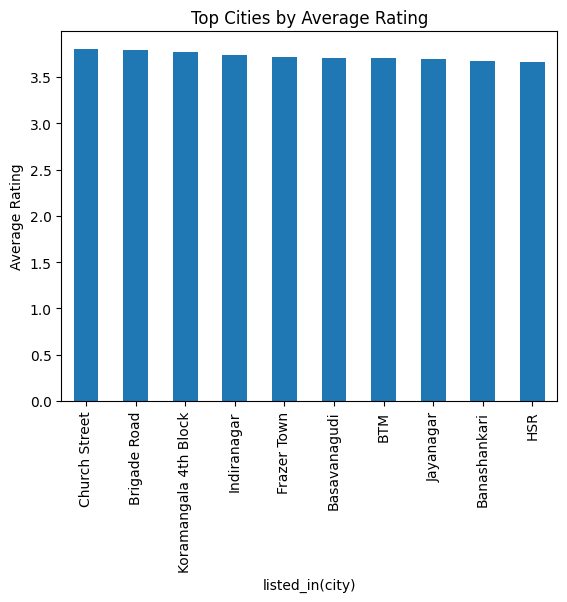

In [43]:
avg_rating_city.plot(kind="bar", title="Top Cities by Average Rating")
plt.ylabel("Average Rating")
plt.show()


In [44]:
avg_cost_city = df.groupby("listed_in(city)")["approx_cost(for two people)"].mean().sort_values(ascending=False).head(10)
avg_cost_city


,approx_cost(for two people)
listed_in(city),
Church Street,844.883721
Brigade Road,833.957766
Indiranagar,700.358774
Frazer Town,609.188620
Bellandur,588.901674
Brookefield,563.910761
Electronic City,562.651332
Koramangala 4th Block,538.646760
Kalyan Nagar,532.296891


In [45]:
popular_cuisines = df.groupby("listed_in(city)")["cuisines"].agg(lambda x: x.value_counts().index[0])
popular_cuisines.head(10)


,cuisines
listed_in(city),
BTM,"North Indian, Chinese"
Banashankari,South Indian
Bannerghatta Road,"North Indian, Chinese"
Basavanagudi,South Indian
Bellandur,North Indian
Brigade Road,North Indian
Brookefield,North Indian
Church Street,North Indian
Electronic City,"North Indian, Chinese"


## Location-Based Analysis and Insights

The geographical analysis of restaurants was performed based on city/locality information from the Zomato dataset.

It was observed that areas such as **BTM, Bannerghatta Road, Bellandur, Brigade Road, Church Street and Electronic City** have a high concentration of restaurants.

South Indian cuisine is dominant in areas like **Banashankari, Basavanagudi, and Frazer Town**, while **North Indian and Chinese cuisines** are most popular in localities such as **BTM, Bannerghatta Road, and Electronic City**.

The average cost for two people is higher in premium locations, indicating that central business areas tend to have more expensive restaurants.

This analysis highlights how restaurant distribution and cuisine popularity vary across different localities, helping to identify food hubs and premium dining zones in the city.
